In [ ]:
#Extracts the date from each .xlsx filename
#Formats the x-axis as MM-YYYY
#Sorts the timeline chronologically
#Plots each country’s submission trend across months

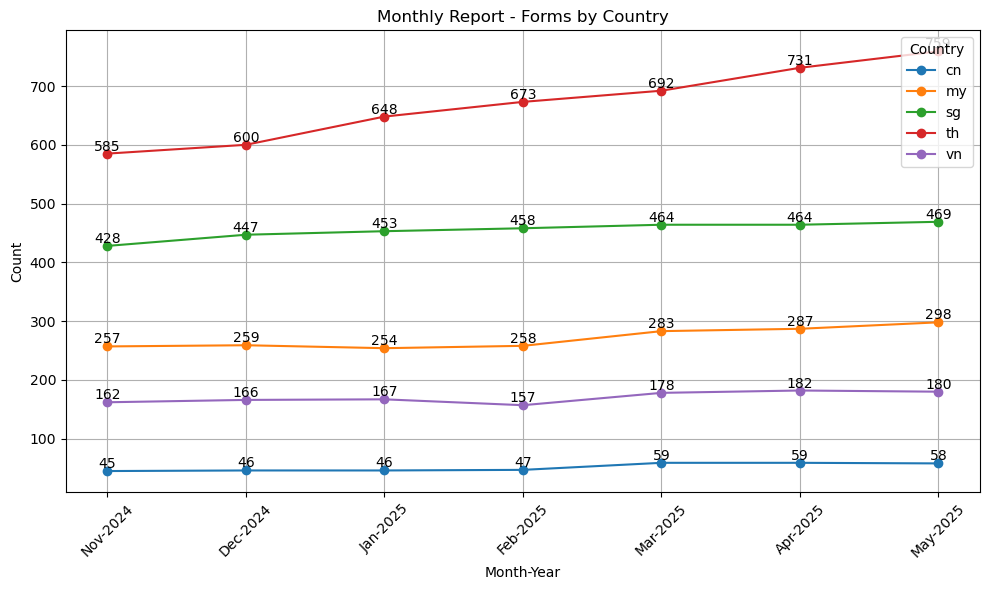

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# Load all .xlsx files with filenames containing dates in dd-mm-yyyy format
excel_files = glob.glob('*.xlsx')

# Initialize an empty list to store data frames
data_frames = []

# Iterate over each file and extract the date from the filename
for file in excel_files:
    date_match = re.search(r'\d{2}-\d{2}-\d{4}', file)
    if date_match:
        date_str = date_match.group()
        date = pd.to_datetime(date_str, format='%d-%m-%Y')
        df = pd.read_excel(file, engine='openpyxl')
        df['Month-Year'] = date.strftime('%b-%Y')  # e.g., Jan-2025
        df['Month-Year-Date'] = date  # for sorting
        data_frames.append(df)

# Combine all data frames
combined_data = pd.concat(data_frames)

# Filter out rows with 'submit', 'complete', or 'thank' in 'Form URL'
filtered_data = combined_data[~combined_data['Form URL'].str.contains('submit|complete|thank|test', case=False, na=False)]

# Count entries by Month-Year and Country
country_counts = filtered_data.groupby(['Month-Year', 'Country']).size().unstack(fill_value=0)

# Sort Month-Year in ascending order
country_counts = country_counts.sort_index(key=lambda x: pd.to_datetime(x, format='%b-%Y'))

# Plot the line chart
plt.figure(figsize=(10, 6))
for country in country_counts.columns:
    plt.plot(country_counts.index, country_counts[country], marker='o', label=country)
    for i, count in enumerate(country_counts[country]):
        plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Monthly Report - Forms by Country')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Save the chart
plt.savefig('monthly_form_submissions_by_country.png')
plt.show()
